Spam Email Classifier: For this problem you will design classifiers to determine if an
email is spam or not. In the file, spam_data.csv¸ you can find the processed data for
5172 emails. For each email (row) the word count is shown for 3000 different possible
words (columns). The last column contains the class (“1” for spam and “0” for not
spam). To visualize this, the figure below shows the word count vs word number for a
spam and a non-spam email.
Split the data using an 80-20 split of training to testing data. Using the training data,
build a classifier model using:
d) Perceptron
e) Logistic Regression
f) Support Vector Machine with the RBF Kernel
Run of each of the above models on the training AND testing data and show a confusion
matrix for each. Additionally, determine the speed (number of seconds) of each model
for training. Which model is the most accurate option for this dataset? Which model is
the fastest option for this dataset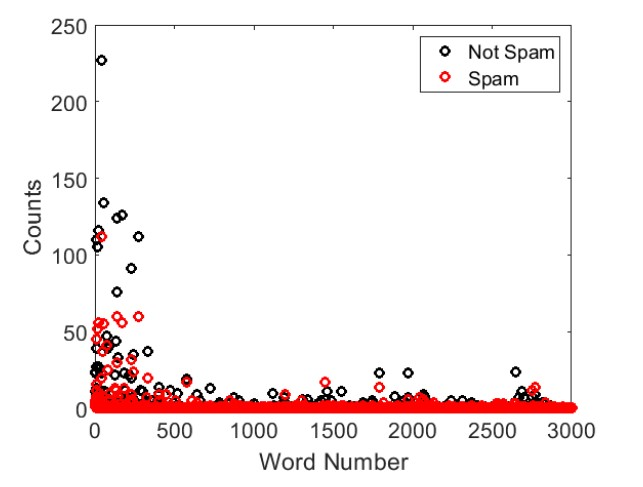

In [21]:
#importing basic python modules
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
#importing necessary sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
df=pd.read_csv("/content/spam_data.csv")

In [24]:
X = df.iloc[:, 1:-1].values  # All columns except the first and last one (word counts)
y = df.iloc[:, -1].values   # Last column is the class (0 or 1)

In [25]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
def train_and_evaluate(model, param_grid, model_name):
    start_time = time.time()
    grid = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
    grid.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time
    best_model = grid.best_estimator_
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    print(f"{model_name} Training Time: {training_time:.4f} seconds")
    print(f"{model_name} Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return best_model, training_time


Perceptron Training Time: 5.7144 seconds
Perceptron Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       735
           1       0.92      0.94      0.93       300

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



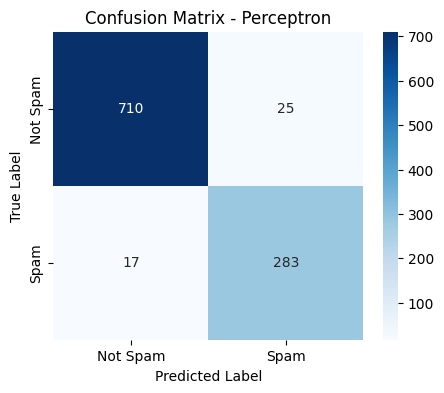

In [28]:
# Training with Perceptron
perceptron_params = {'alpha': [0.0001, 0.001, 0.01, 0.1]}
best_perceptron, time_perceptron = train_and_evaluate(Perceptron(max_iter=1000, random_state=42), perceptron_params, "Perceptron")


Logistic Regression Training Time: 14.3280 seconds
Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       735
           1       0.94      0.98      0.96       300

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



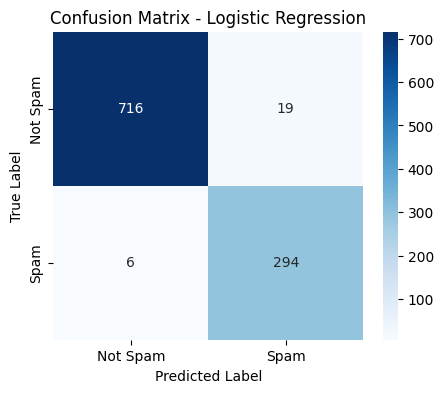

In [29]:
# Training with Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100]}
best_log_reg, time_log_reg = train_and_evaluate(LogisticRegression(max_iter=1000, random_state=42), log_reg_params, "Logistic Regression")

In [ ]:
# Train SVM with RBF Kernel
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
best_svm, time_svm = train_and_evaluate(SVC(kernel='rbf', random_state=42), svm_params, "SVM (RBF Kernel)")

In [ ]:
# Comparing training times
print("\nModel Training Time Comparison:")
print(f"Perceptron: {time_perceptron:.4f} seconds")
print(f"Logistic Regression: {time_log_reg:.4f} seconds")
print(f"SVM (RBF Kernel): {time_svm:.4f} seconds")